In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('D:\DataSci\Resources\\automobileEDA.csv')
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# making a linear regression model 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['highway-mpg']] # predictor variable
Y = df['price'] # target variable
lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]
b_0 = lm.intercept_
b_1 = lm.coef_

print(f'Yhat = {float(b_1)}X + {b_0}')
# returns : Yhat = -821.7333783219254X + 38423.3058581574


In [12]:
# making a multiple linear regression model
lm1 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm1.fit(Z,df['price'])
coeffs = []
for b in lm1.coef_ :
    coeffs.append(float(b))

print(coeffs)


[53.49574422604914, 4.707700994613942, 81.53026382122762, 36.05748881648592]


(0.0, 48163.13157476882)

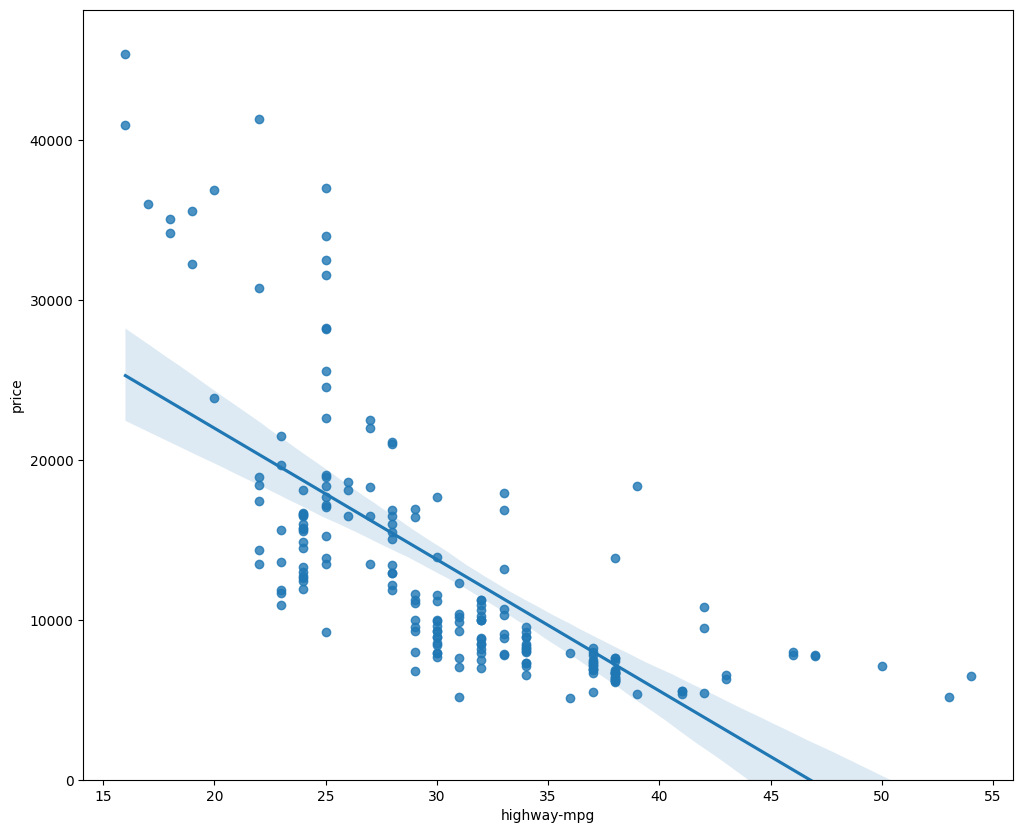

In [13]:
# creating visualizations for evaluating different models

#regression plot for a simple linear regression between mpg and price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

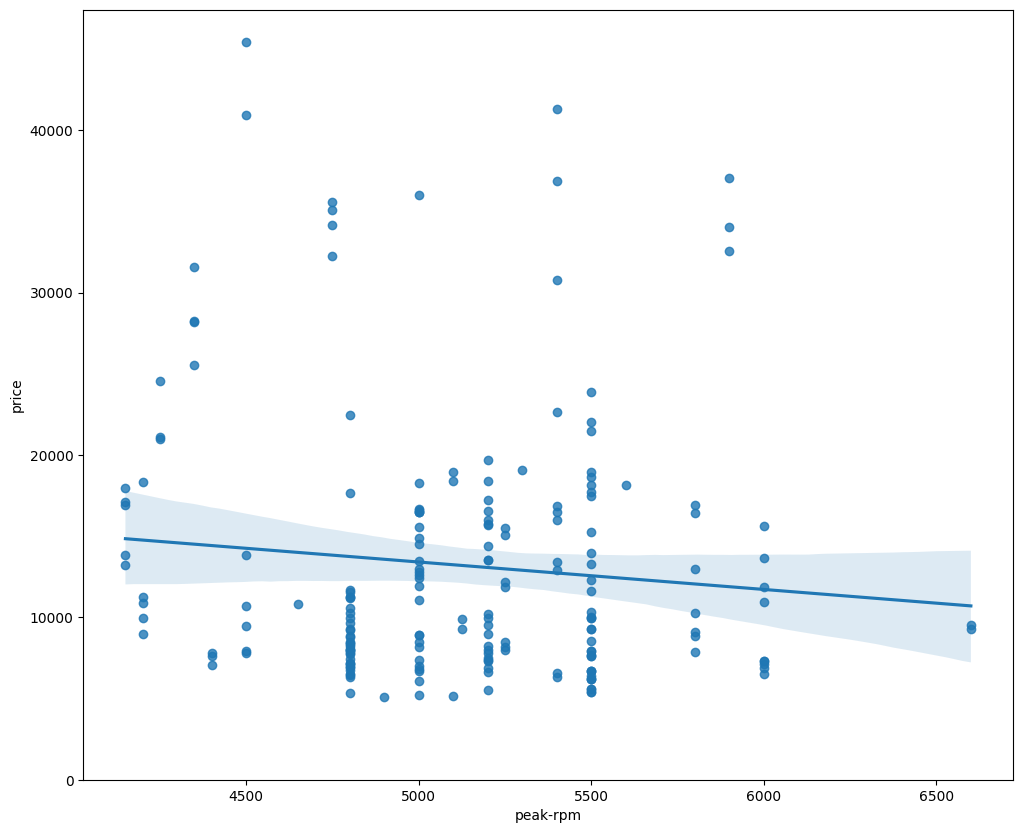

In [14]:
# making a reg plot to evaluate a SLR b/w price and peak rpm
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [ ]:
# from the data it seems that mpg is more strongly correlated to price than peak rpm is
#let us prove that numerically now

rpm_cor = df[["peak-rpm","price"]].corr()
mpg_pcor = df[["highway-mpg","price"]].corr()
print(rpm_cor) #-0.101616
print(mpg_pcor) #-0.704692

#so clearly the mpg is a better indicator of price 


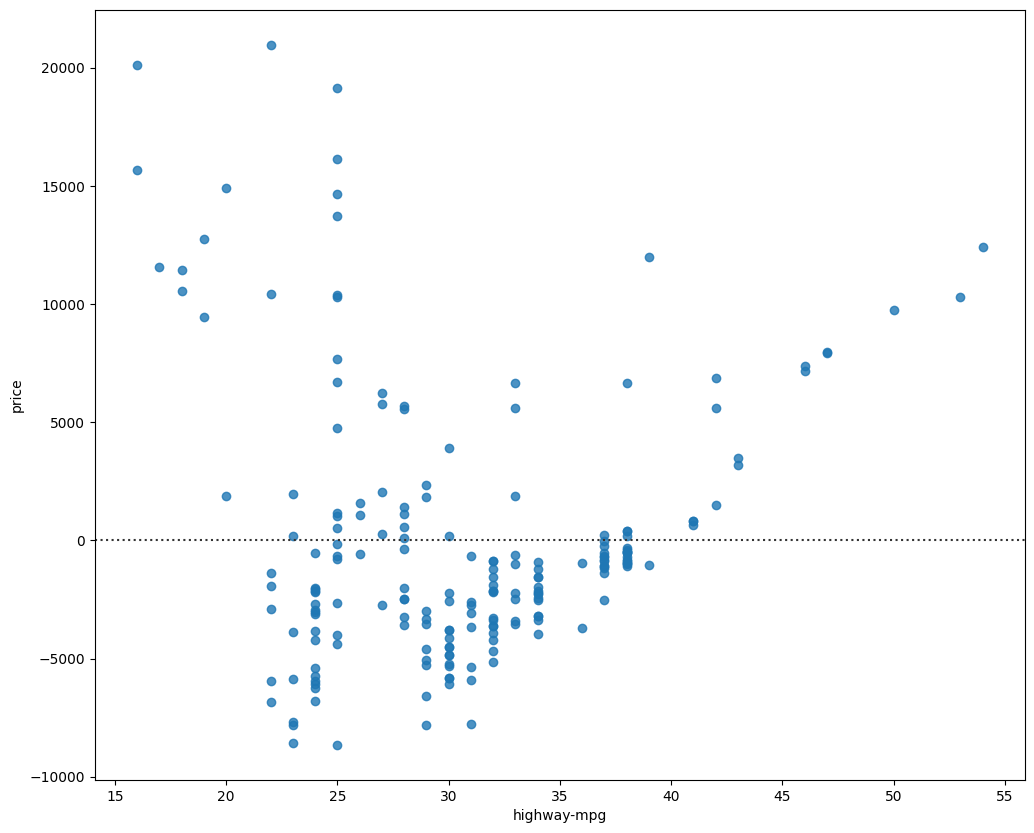

In [19]:
# Using Residual plots
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [20]:
# but points here are NOT randomly spread out! so we need something better than the SLR

C:\Users\Ojas\AppData\Local\Temp\ipykernel_20516\2327649113.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Ojas\AppData\Local\Temp\ipykernel_20516\2327649113.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

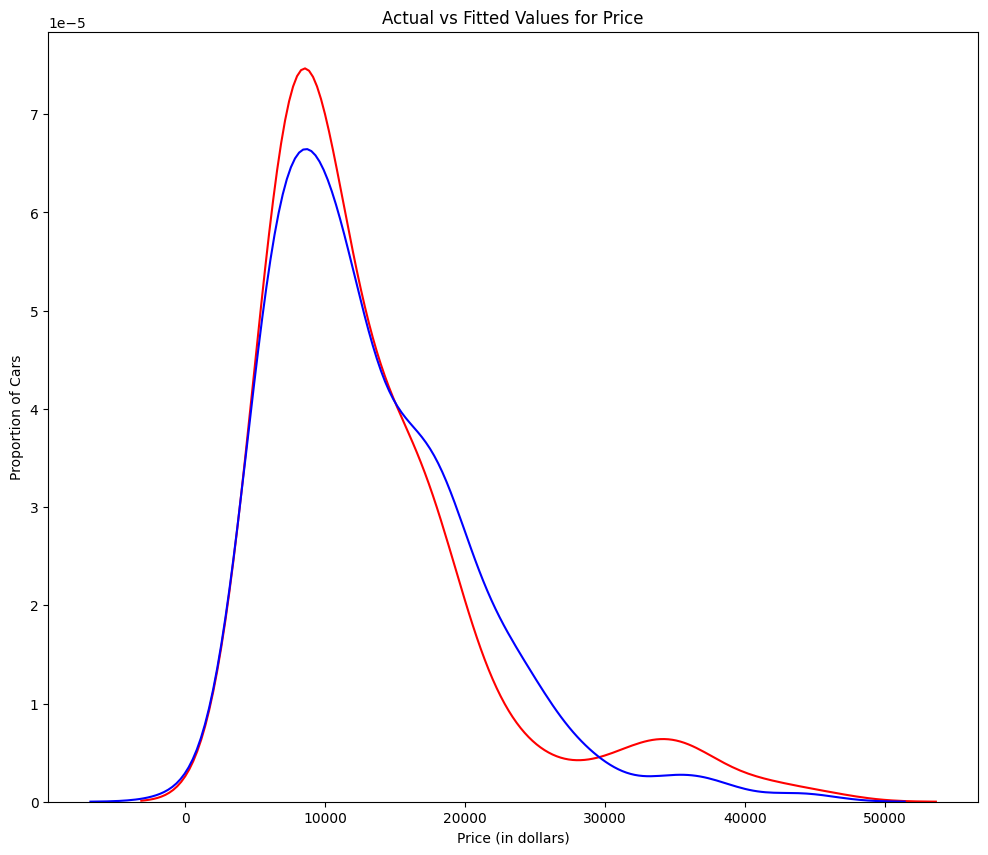

In [21]:
# using distribution plot

Y_hat_1 = lm1.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


In [22]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [23]:
# creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(input)



In [24]:
Z = Z.astype(float)

In [25]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [26]:
input_1 = [('scale', StandardScaler()), ('linearReg', LinearRegression())]
pipe_1 = Pipeline(input_1)
pipe_1.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('linearReg', LinearRegression())])

In [27]:
# let us evaluate the models now

In [29]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
#returns 0.49.. means the model is only 49% true

The R-square is:  0.4965911884339176


In [30]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [31]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

C:\Users\Ojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


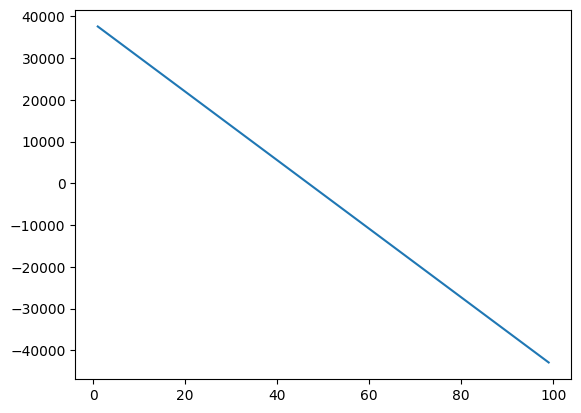

In [32]:
yhat=lm.predict(new_input)
plt.plot(new_input, yhat)
plt.show()